<a href="https://colab.research.google.com/github/Cris12Mainz/Topological-Defects/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First.
- We connect the drive.
- We define the files training and validation -> inside each there are two more files: defect and nodefect.
-

In [1]:
# import standard python libraries
import os, urllib, io
from datetime import datetime
import numpy as np

In [2]:
# import the PyTorch deep learning library
import torch, torchvision
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

In [3]:
# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# import matplotlib, seaborn, and PIL data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [5]:
# import the Google Colab GDrive connector
from google.colab import drive

# mount GDrive inside the Colab notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
 # create data sub-directory
data_dir = '/content/drive/MyDrive/Topological_Defects'
if not os.path.exists(data_dir): os.makedirs(data_dir)

In [7]:
## Here we create the files "training" and "validation" where inside each of these files
## there are files called "defect" and "neutro"
import os
import glob

#create training dir
training_dir = os.path.join(data_dir,"training")
if not os.path.isdir(training_dir):
  os.mkdir(training_dir)

#create defect in training
defect_training_dir = os.path.join(training_dir,"defect")
if not os.path.isdir(defect_training_dir):
  os.mkdir(defect_training_dir)

#create nodefect in training
neutro_training_dir = os.path.join(training_dir,"neutro")
if not os.path.isdir(neutro_training_dir):
  os.mkdir(neutro_training_dir)

#create validation dir
validation_dir = os.path.join(data_dir,"validation")
if not os.path.isdir(validation_dir):
  os.mkdir(validation_dir)

#create defect in validation
defect_validation_dir = os.path.join(validation_dir,"defect")
if not os.path.isdir(defect_validation_dir):
  os.mkdir(defect_validation_dir)

#create nodefect in validation
neutro_validation_dir = os.path.join(validation_dir,"neutro")
if not os.path.isdir(neutro_validation_dir):
  os.mkdir(neutro_validation_dir)

In [21]:
## Here we have distribuited the data for "training" and for "validation"

#now we have to shuffle the images and divide it between the train and validation
import shutil

split_size = 0.70
nodefect_imgs_size = len(glob.glob("/content/drive/MyDrive/Topological_Defects/data/neutro*"))
defect_imgs_size = len(glob.glob("/content/drive/MyDrive/Topological_Defects/data/defect*"))

for i,img in enumerate(glob.glob("/content/drive/MyDrive/Topological_Defects/data/neutro*")):
  if i < (nodefect_imgs_size * split_size):
    shutil.move(img,neutro_training_dir)
  else:
    shutil.move(img,neutro_validation_dir)

for i,img in enumerate(glob.glob("/content/drive/MyDrive/Topological_Defects/data/defect*")):
  if i < (defect_imgs_size * split_size):
    shutil.move(img,defect_training_dir)
  else:
    shutil.move(img,defect_validation_dir)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from IPython.core.pylabtools import figsize

In [23]:
classes = ['neutro', 'defect']
# labe = 0 -> neutro
# label = 1 -> defect
print(classes[0])
print(classes[1])

neutro
defect


In [24]:
traindir = "/content/drive/MyDrive/Topological_Defects/training"
validir = "/content/drive/MyDrive/Topological_Defects/validation"
transf = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [25]:
## Transform the ndarray to a tensor!

train_data = torchvision.datasets.ImageFolder(traindir,transform=transf)
test_data = torchvision.datasets.ImageFolder(validir,transform=transf)

In [56]:
### Pixels of the pictures

img_id = 10

image, label = train_data[img_id] ##

#picture = plt.imread(image)
#print(image.shape) -> ([3,300,300])
#print(type(image)) -> torch.Tensor
## image.shape = ([chanels, height, width])

300 300
Number of pixels: 90000
<class 'torch.Tensor'>


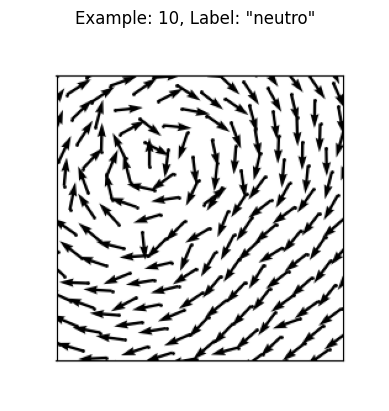

In [76]:
## Let's visualize the picture of 300x300 pixels
# define tensor to image transformation
image_id = 10
image, label = train_data[image_id]

trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: "{}"'.format(str(image_id), str(classes[label])))
plt.axis('off')
test_image_plot = image / 2.0 + 0.5
#test_image_plot = test_image
# plot 10 image sample
plt.imshow(trans(test_image_plot))

# Get the dimensions from the tensor shape
channels, height, width = test_image_plot.shape

# Calculate the number of pixels
num_pixels = height * width
print(height,width)
print(f"Number of pixels: {num_pixels}")
print(type(test_image_plot))

In [ ]:
## Let's change the pixels from (300,300) to (160,160)

In [53]:
# Resize the image tensor using torchvision.transforms.Resize
resize_transform = torchvision.transforms.Resize((160, 160))


##### Resize of the pictures
train_data_resized = []
resize_image = []
#resize_image = []
for i in range(len(train_data)):
  image, label = train_data[i]
  out = resize_transform(image)  #The resize operation on tensor.
  resize_image.append(out) ##
  train_data_resized.append((out, label))

# train_data_resized: the train data that contains imagen (tensor) and label
# resize_image is an ndarray that contains the image part of train_data_resized.
# resize_image has pictures of (3,160,160)

In [73]:
## Let's check the pixels of the new pictures
print(resize_image[0].shape)

torch.Size([3, 160, 160])


160 160
Number of pixels: 25600
<class 'torch.Tensor'>


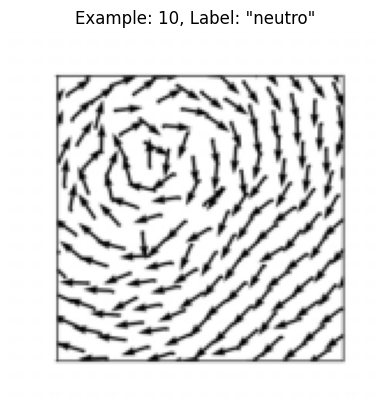

In [75]:
## Let's visualize the new pictures (3,160,160)
## We have plot the same picture and we can obviously
#see the quality has decreased

# define tensor to image transformation
image_id = 10
image, label = train_data_resized[image_id]

trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: "{}"'.format(str(image_id), str(classes[label])))
plt.axis('off')
test_image_plot = image / 2.0 + 0.5
#test_image_plot = test_image
# plot 10 image sample
plt.imshow(trans(test_image_plot))

# Get the dimensions from the tensor shape
channels, height, width = test_image_plot.shape

# Calculate the number of pixels
num_pixels = height * width
print(height,width)
print(f"Number of pixels: {num_pixels}")
print(type(test_image_plot))

Neural Network Implementation

In [ ]:
# implement the CIFAR10Net network architecture
class binary(nn.Module):

    # define the class constructor
    def __init__(self):

        # call super class constructor
        super(binary, self).__init__()

        # specify convolution layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)

        # define max-pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # specify convolution layer 2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)

        # define max-pooling layer 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # specify fc layer 1 - in 16 * 5 * 5, out 120
        self.linear1 = nn.Linear(16 * 5 * 5, 120, bias=True) # the linearity W*x+b
        self.relu1 = nn.ReLU(inplace=True) # the non-linearity

        # specify fc layer 2 - in 120, out 84
        self.linear2 = nn.Linear(120, 84, bias=True) # the linearity W*x+b
        self.relu2 = nn.ReLU(inplace=True) # the non-linarity

        # specify fc layer 3 - in 84, out 10
        self.linear3 = nn.Linear(84, 10) # the linearity W*x+b

        # add a softmax to the last layer
        self.logsoftmax = nn.LogSoftmax(dim=1) # the softmax

    # define network forward pass
    def forward(self, images):

        # high-level feature learning via convolutional layers

        # define conv layer 1 forward pass
        x = self.pool1(self.relu1(self.conv1(images)))

        # define conv layer 2 forward pass
        x = self.pool2(self.relu2(self.conv2(x)))

        # feature flattening

        # reshape image pixels
        x = x.view(-1, 16 * 5 * 5)

        # combination of feature learning via non-linear layers

        # define fc layer 1 forward pass
        x = self.relu1(self.linear1(x))

        # define fc layer 2 forward pass
        x = self.relu2(self.linear2(x))

        # define layer 3 forward pass
        x = self.logsoftmax(self.linear3(x))

        # return forward pass result
        return x